In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import pickle

In [2]:
#retrieve and format data - into labels from the dataset
def labels(filename):
    data = pd.read_csv(filename)
    data_y = data['LABEL']
    data_y-= 1
    return data_y

In [3]:
with open("../archive/ProcessData.npy", 'rb') as f:
        training_data_x = np.load(f)
        testing_data_x = np.load(f)
        
training_data_y = labels("../archive/exoTrain.csv")
testing_data_y = labels("../archive/exoTest.csv")

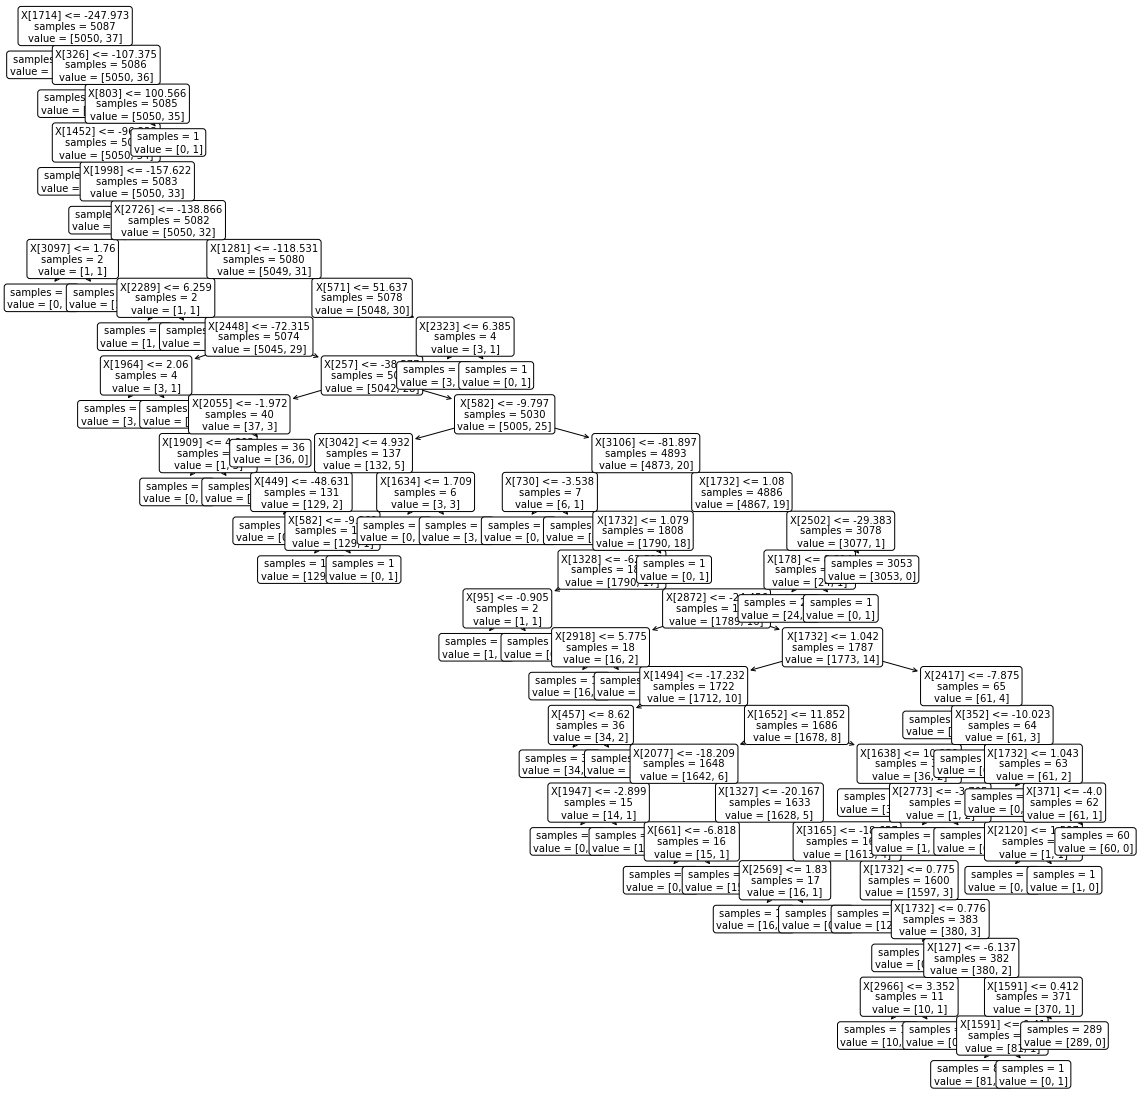

Accuracy percentage:  98.42105263157895 %


In [4]:
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(training_data_x, training_data_y)

plt.figure(figsize=(20,20))
tree.plot_tree(DTclassifier, fontsize=10, impurity=False, rounded=True)
plt.show()

y_pred = DTclassifier.predict(testing_data_x)
print("Accuracy percentage: ", accuracy_score(testing_data_y, y_pred)*100, "%")

0.4964601769911504
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       565
           1       0.00      0.00      0.00         5

    accuracy                           0.98       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.98      0.98       570



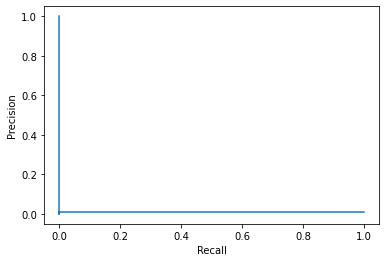

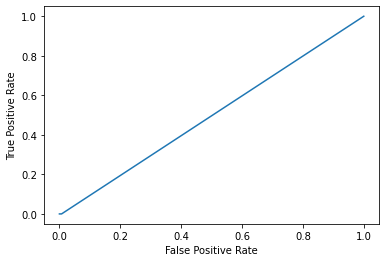

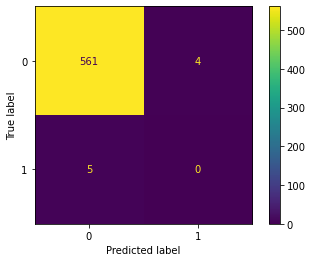

In [5]:
prec, recall, _ = metrics.precision_recall_curve(testing_data_y, y_pred)
metrics.PrecisionRecallDisplay(precision=prec, recall=recall).plot()

fpr, tpr, _ = metrics.roc_curve(testing_data_y, y_pred)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print(metrics.roc_auc_score(testing_data_y, y_pred))

cm = metrics.confusion_matrix(testing_data_y, y_pred)
metrics.ConfusionMatrixDisplay(cm).plot()

print(metrics.classification_report(testing_data_y, y_pred))

In [6]:
with open('tf-models/decision-tree.pkl','wb') as f:
    pickle.dump(DTclassifier,f)

In [7]:
RFclassifier = RandomForestClassifier()
RFclassifier.fit(training_data_x, training_data_y)
y_pred = RFclassifier.predict(testing_data_x)
print("Accuracy percentage: ", accuracy_score(testing_data_y, y_pred)*100, "%")

Accuracy percentage:  99.12280701754386 %


0.5
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


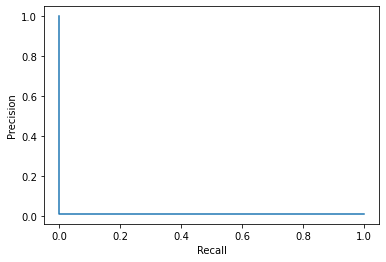

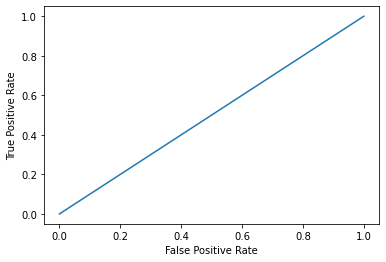

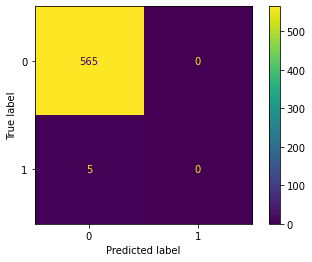

In [8]:
prec, recall, _ = metrics.precision_recall_curve(testing_data_y, y_pred)
metrics.PrecisionRecallDisplay(precision=prec, recall=recall).plot()

fpr, tpr, _ = metrics.roc_curve(testing_data_y, y_pred)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print(metrics.roc_auc_score(testing_data_y, y_pred))

cm = metrics.confusion_matrix(testing_data_y, y_pred)
metrics.ConfusionMatrixDisplay(cm).plot()

print(metrics.classification_report(testing_data_y, y_pred))

In [9]:
with open('tf-models/random-forest.pkl','wb') as f:
    pickle.dump(RFclassifier,f)